<a href="https://colab.research.google.com/github/mithilesh-p/Fake-Job-Prediction/blob/main/Fake_Job_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **IMPORTING IMPOTANT LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
%matplotlib inline


 IMPORTING THE DATA 

In [2]:
df1 = pd.read_csv('C:/Users/DELL/Downloads/fake_job_postings.csv')
df1.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [3]:
df1.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [102]:
col_desc = pd.DataFrame()
col_desc["column"] = df1.columns
col_desc["description"] = [
    "A unique ID assigned to each job",
    "The title of the advertised position or job",
    "Information about where is the job",
    "The department offering the job",
    "The amount that the job pays",
    "Information about the company advertising the job",
    "Job description",
    "Requirements enlisted",
    "Benefits offered by the company with the job",
    "1 if work from home allowed, 0 otherwise",
    "1 if the company has a logo, 0 otherwise",
    "1 if the job has any questions, 0 otherwise",
    "full-time, part-time, or contract etc.",
    "the experience required for the job",
    "educational requirements for the job",
    "The industry the job is in e.g engineering",
    "what work is required from the applicant",
    "1 if fake job, 0 if real job"
]
col_desc['data_type']=['int64','object','object','object','object','object','object','object','object','int64','int64','int64','object','object','object','object','object','int64']
col_desc

,column,description,data_type
0,job_id,A unique ID assigned to each job,int64
1,title,The title of the advertised position or job,object
2,location,Information about where is the job,object
3,department,The department offering the job,object
4,salary_range,The amount that the job pays,object
5,company_profile,Information about the company advertising the job,object
6,description,Job description,object
7,requirements,Requirements enlisted,object
8,benefits,Benefits offered by the company with the job,object
9,telecommuting,"1 if work from home allowed, 0 otherwise",int64


In [101]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

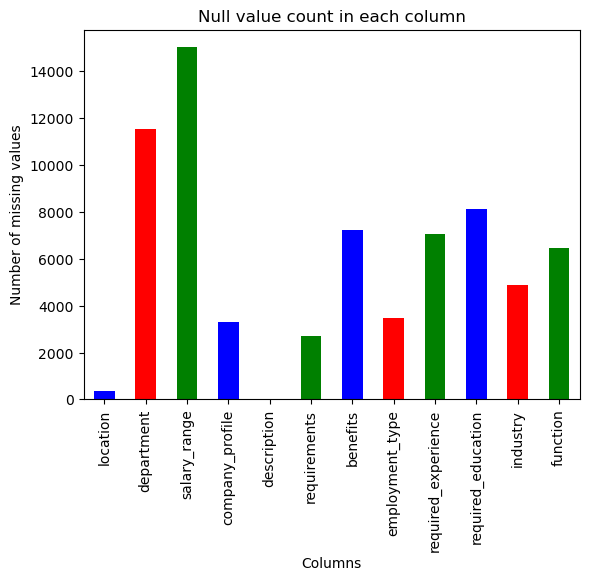

In [5]:
missing = df1.isna().sum()
missing = missing[missing!=0]

ax = missing.plot(kind='bar', color=["b", "r", "g"])
ax.set_ylabel("Number of missing values")
ax.set_xlabel("Columns")
_ = plt.title("Null value count in each column")

In [6]:
df=df1[['title','description','fraudulent']]
df.head()

,title,description,fraudulent
0,Marketing Intern,"Food52, a fast-growing, James Beard Award-winn...",0
1,Customer Service - Cloud Video Production,Organised - Focused - Vibrant - Awesome!Do you...,0
2,Commissioning Machinery Assistant (CMA),"Our client, located in Houston, is actively se...",0
3,Account Executive - Washington DC,THE COMPANY: ESRI – Environmental Systems Rese...,0
4,Bill Review Manager,JOB TITLE: Itemization Review ManagerLOCATION:...,0


In [7]:
df.isna().sum()

title          0
description    1
fraudulent     0
dtype: int64

In [8]:
###Drop Nan Values
df=df.dropna()

In [9]:
df.isna().sum()
df.shape

(17879, 3)

In [10]:
## Get the Independent Features
X=df.drop('fraudulent',axis=1)

In [11]:
## Get the Dependent features
y=df['fraudulent']

Data Visualization

In [12]:
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px

In [13]:
df.fraudulent.value_counts()

0    17014
1      865
Name: fraudulent, dtype: int64

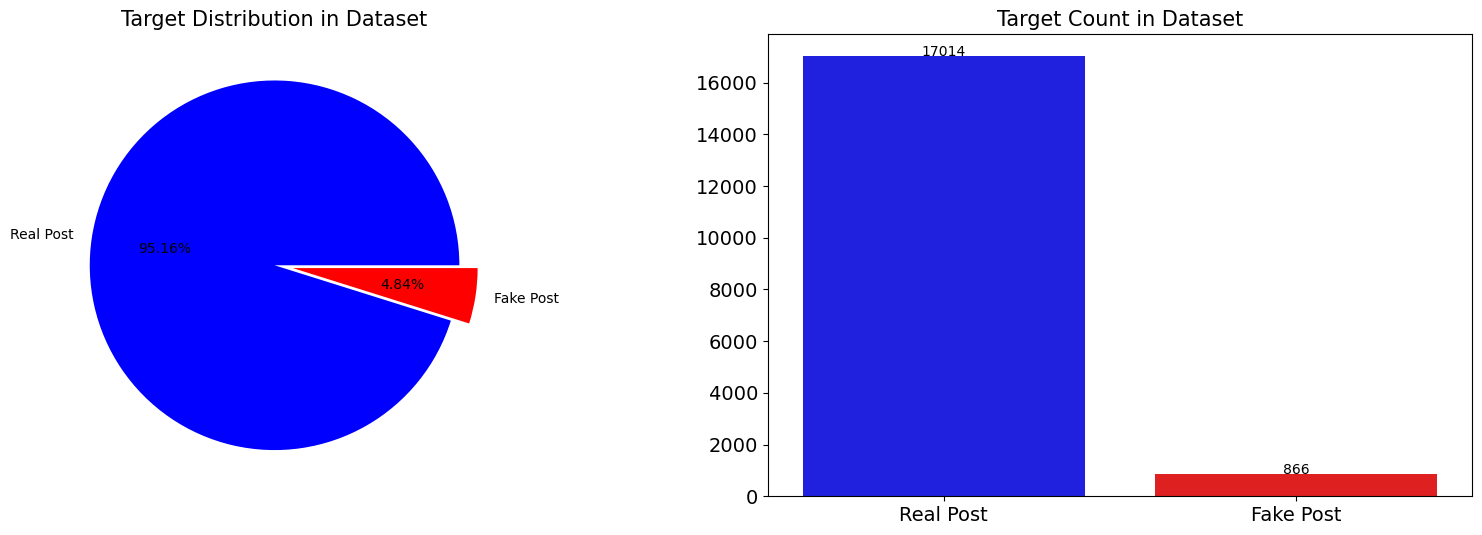

In [14]:
# Count of each category
counts = df1['fraudulent'].value_counts()

# Creating subplots
f, ax = plt.subplots(1, 2, figsize=(20, 6))

# Pie chart
ax[0] = counts.plot.pie(explode=[0, 0.1], autopct='%1.2f%%', ax=ax[0], labels=['Real Post', 'Fake Post'], colors=['blue', 'red'])
ax[0].set_ylabel(' ')
ax[0].set_title('Target Distribution in Dataset', fontsize=15)

# Bar chart
ax[1] = sns.barplot(x=counts.index, y=counts, ax=ax[1], palette=["blue", "red"])
ax[1].set_xticklabels(["Real Post", "Fake Post"])
ax[1].set_ylabel(' ')
ax[1].set_title('Target Count in Dataset', fontsize=15)

# Adding counts on top of the bars
for i, p in enumerate(ax[1].patches):
    height = p.get_height()
    ax[1].text(p.get_x() + p.get_width() / 2., height + 0.9, counts[i], ha="center")

# Applying CSS from previous settings
for ax_single in ax:
    ax_single.tick_params(axis='both', labelsize=14)  # Adjust tick label size
    ax_single.title.set_fontsize(15)  # Adjust title font size

plt.show()


In [15]:
#@title
#Label counts for each attribute
labelcountlist = []
for x in df.columns:
        labelcountlist.append((len(df[x].unique())))
labelcount = pd.DataFrame({'Attribute': df.columns, 'Count': labelcountlist})
print(labelcount)

     Attribute  Count
0        title  11231
1  description  14801
2   fraudulent      2


In [16]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout

In [17]:
message = X.copy()
print(message)

                                                   title  \
0                                       Marketing Intern   
1              Customer Service - Cloud Video Production   
2                Commissioning Machinery Assistant (CMA)   
3                      Account Executive - Washington DC   
4                                    Bill Review Manager   
...                                                  ...   
17875                   Account Director - Distribution    
17876                                 Payroll Accountant   
17877  Project Cost Control Staff Engineer - Cost Con...   
17878                                   Graphic Designer   
17879                         Web Application Developers   

                                             description  
0      Food52, a fast-growing, James Beard Award-winn...  
1      Organised - Focused - Vibrant - Awesome!Do you...  
2      Our client, located in Houston, is actively se...  
3      THE COMPANY: ESRI – Environmental Sy

In [18]:
message.reset_index(inplace=True)

In [19]:
import nltk
import re
from nltk.corpus import stopwords

In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**STEMMING OPERATION and Data Cleaning**

In [21]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(message)):
#     review=re.compile(r"<.*?>")   
    review = re.sub('[^a-zA-Z]', ' ', message['description'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [22]:
corpus1 = []
for i in range(0, len(message)):
#     review=re.compile(r"<.*?>")   
    review = re.sub('[^a-zA-Z]', ' ', message['title'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus1.append(review)

In [23]:
corpus[1]

'organis focus vibrant awesom passion custom servic slick type skill mayb account manag think administr cooler polar bear jetski need hear cloud video product servic opper glodal level yeah pretti cool seriou deliv world class product excel custom servic rapidli expand busi look talent project manag manag success deliveri video project manag client commun drive product process work coolest brand planet learn global team repres nz huge way enter next growth stage busi grow quickli intern therefor posit burst opportun right person enter busi right time second world cloud video product servic http url fbe afac cd c f b eef e e f ca dd second world cloud video product servic enabl brand agenc get high qualiti onlin video content shot produc anywher world fast afford manag seamlessli cloud purchas publish second remov hassl cost risk speed issu work regular video product compani manag everi aspect video project beauti onlin experi grow network rate video profession countri dedic product suc

In [24]:
corpus1[1]

'custom servic cloud video product'

In [25]:
len(corpus)

17879

In [26]:
message.shape

(17879, 3)

In [27]:
message.title=corpus1
message.description=corpus

In [28]:
message.head()

,index,title,description
0,0,market intern,food fast grow jame beard award win onlin food...
1,1,custom servic cloud video product,organis focus vibrant awesom passion custom se...
2,2,commiss machineri assist cma,client locat houston activ seek experienc comm...
3,3,account execut washington dc,compani esri environment system research insti...
4,4,bill review manag,job titl item review managerloc fort worth tx ...


** One Hot Representation**

In [29]:
pip install keras-tuner --upgrade

Note: you may need to restart the kernel to use updated packages.


In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import keras_tuner as kt
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM

In [31]:
voc_size=5000

In [32]:
onehot_repr1=[one_hot(words,voc_size)for words in corpus1] 
onehot_repr1[1]

[1494, 1670, 61, 2599, 300]

In [33]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr[1]

[4382,
 1938,
 1313,
 3528,
 1403,
 1494,
 1670,
 2204,
 2018,
 4842,
 3669,
 3265,
 1591,
 1802,
 4974,
 1571,
 157,
 3958,
 4085,
 1838,
 3623,
 61,
 2599,
 300,
 1670,
 4609,
 4380,
 3935,
 3195,
 4207,
 4422,
 3275,
 3508,
 2124,
 756,
 300,
 4494,
 1494,
 1670,
 3338,
 3606,
 3000,
 3936,
 2138,
 3779,
 1591,
 1591,
 660,
 819,
 2599,
 3779,
 1591,
 2512,
 1615,
 4653,
 300,
 1506,
 2712,
 3402,
 3377,
 4047,
 171,
 2199,
 669,
 4228,
 1372,
 258,
 2418,
 1218,
 2987,
 4520,
 4437,
 3000,
 2658,
 352,
 4754,
 4164,
 4341,
 984,
 1926,
 3557,
 3519,
 1218,
 3000,
 3557,
 4193,
 1769,
 2124,
 61,
 2599,
 300,
 1670,
 10,
 2714,
 2452,
 2432,
 3103,
 4267,
 571,
 316,
 1100,
 4789,
 4789,
 571,
 812,
 1581,
 1769,
 2124,
 61,
 2599,
 300,
 1670,
 811,
 3377,
 558,
 1989,
 2617,
 4856,
 4345,
 2599,
 4581,
 36,
 3331,
 1097,
 2124,
 3232,
 3947,
 1591,
 4380,
 61,
 10,
 4200,
 1769,
 1376,
 4703,
 4563,
 2453,
 2105,
 519,
 2712,
 2446,
 2599,
 300,
 2066,
 1591,
 1021,
 1160,
 2599,


 **PADDING THE ONE HOT REPRESENTATION**

In [34]:
sent_length=40
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
embedded_tit=pad_sequences(onehot_repr1,padding='pre',maxlen=sent_length)
print(embedded_docs)
print(embedded_tit)

[[ 715 4581 1591 ... 1429 3742 3308]
 [ 660 3264 3063 ... 1681 2425  189]
 [   0    0    0 ... 2289 3671 2768]
 ...
 [ 761 1875   56 ... 4843  401 3942]
 [1804  733 4668 ... 4600 4754 3779]
 [1265 1349 2772 ... 3195   40  282]]
[[   0    0    0 ...    0 1429 4754]
 [   0    0    0 ...   61 2599  300]
 [   0    0    0 ... 3143 4863 3886]
 ...
 [   0    0    0 ... 4843 2524  483]
 [   0    0    0 ...    0 4668 3179]
 [   0    0    0 ...  573 2229 2593]]


In [35]:
message.title=np.array(embedded_tit)
message.description=np.array(embedded_docs)

In [36]:
index=range(0,15184)

In [39]:
x_final=np.concatenate(([np.array(embedded_docs),np.array(embedded_tit)]),axis=1)
y_final=np.array(y)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score,classification_report
x_train, x_test, y_train, y_test = train_test_split(x_final, y_final, test_size=0.20)
print(x_train.shape)

(14303, 80)


In [41]:
x_train


array([[ 749, 2585, 3197, ..., 1274, 2608, 1838],
       [  99, 2432, 3956, ...,    0, 4563, 4208],
       [3001, 4471, 3001, ...,    0, 3001, 1591],
       ...,
       [ 805, 1722, 2712, ..., 2037, 1565, 2316],
       [4181, 3404, 3442, ...,    0, 4505, 3445],
       [   0,    0,    0, ..., 3331, 4073, 1670]])

In [42]:
emb_vec_feature=40

Modelling

In [43]:
#@title
Model_Score1= []
Model_Score2=[]
Model_Score3=[]
Model_Score4=[]
Model_Score5=[]
Model_Name = []

MLP Classifier

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [51]:
ss=StandardScaler()
X_train=ss.fit_transform(x_train)
X_test=ss.transform(x_test)

In [52]:
clf = MLPClassifier(activation='logistic', hidden_layer_sizes=6, solver='lbfgs', max_iter=1000, random_state=1)
clf.fit(X_train,y_train)


MLPClassifier(activation='logistic', hidden_layer_sizes=6, max_iter=1000,
              random_state=1, solver='lbfgs')

In [53]:
clf_pred=clf.predict(X_test)

In [54]:
confusion_matrix(y_test,clf_pred)

array([[3407,   26],
       [ 109,   34]], dtype=int64)

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,clf_pred)

0.962248322147651

In [56]:
clf_pred =clf.predict(X_test)
print(classification_report(y_test, clf_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3433
           1       0.57      0.24      0.33       143

    accuracy                           0.96      3576
   macro avg       0.77      0.62      0.66      3576
weighted avg       0.95      0.96      0.95      3576



<AxesSubplot:>

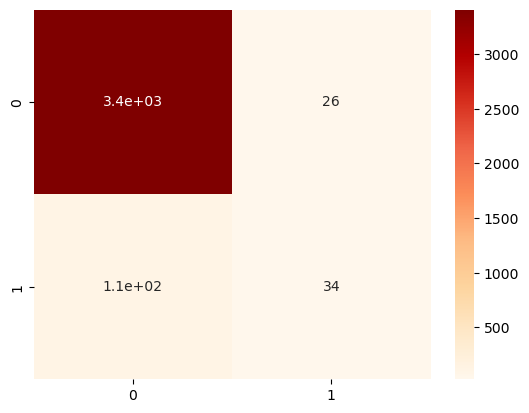

In [57]:
Model_Name.append('Multi Layer Perceptron')

Model_Score1.append(round(accuracy_score(y_test,  clf_pred), 4))
Model_Score2.append(round(precision_score(y_test,  clf_pred), 4))
Model_Score3.append(round(recall_score(y_test,  clf_pred), 4))
Model_Score4.append(round(f1_score(y_test,  clf_pred), 4))
Model_Score5.append(round(roc_auc_score(y_test,  clf_pred), 4))

# Generate confusion matrix
cm = confusion_matrix(y_test, clf_pred)

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap='OrRd')

<h2>BUILDING A Bi-Directinoal LSTM WITH FEW LAYER</h2>

In [58]:
embedding_vector_features=50
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length*2))
model1.add(Bidirectional(LSTM(100))) ##Just add bidirectional!!, except it would just behave as normal LSTM Model
model1.add(Dropout(0.3))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 80, 50)            250000    
                                                                 
 bidirectional (Bidirection  (None, 200)               120800    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 371001 (1.42 MB)
Trainable params: 371001 (1.42 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [59]:

from sklearn.preprocessing import LabelEncoder

# Assuming x_train, x_test, y_train, and y_test are your input data and target labels

# Encode the target labels
le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Convert the input data and target labels to float tensors or NumPy arrays
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')
model1.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,batch_size=64)


Epoch 1/50


224/224 [==============================] - 27s 97ms/step - loss: 0.1883 - accuracy: 0.9523 - val_loss: 0.1131 - val_accuracy: 0.9659
Epoch 2/50
224/224 [==============================] - 21s 95ms/step - loss: 0.0950 - accuracy: 0.9700 - val_loss: 0.1030 - val_accuracy: 0.9729
Epoch 3/50
224/224 [==============================] - 21s 95ms/step - loss: 0.0603 - accuracy: 0.9818 - val_loss: 0.1000 - val_accuracy: 0.9701
Epoch 4/50
224/224 [==============================] - 22s 99ms/step - loss: 0.0423 - accuracy: 0.9864 - val_loss: 0.0993 - val_accuracy: 0.9754
Epoch 5/50
224/224 [==============================] - 25s 113ms/step - loss: 0.0256 - accuracy: 0.9931 - val_loss: 0.1034 - val_accuracy: 0.9734
Epoch 6/50
224/224 [==============================] - 21s 95ms/step - loss: 0.0179 - accuracy: 0.9953 - val_loss: 0.1344 - val_accuracy: 0.9740
Epoch 7/50
224/224 [==============================] - 21s 95ms/step - loss: 0.0103 - accuracy: 0.9973 - val_loss: 0.1449 - val_accura

In [60]:
y_pred=model1.predict(x_test)
y_pred = np.round(y_pred).astype(int)
y_pred

112/112 [==============================] - 3s 18ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [61]:
confusion_matrix(y_test,y_pred)


array([[3390,   43],
       [  59,   84]], dtype=int64)

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.9714765100671141

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      3433
         1.0       0.66      0.59      0.62       143

    accuracy                           0.97      3576
   macro avg       0.82      0.79      0.80      3576
weighted avg       0.97      0.97      0.97      3576



<AxesSubplot:>

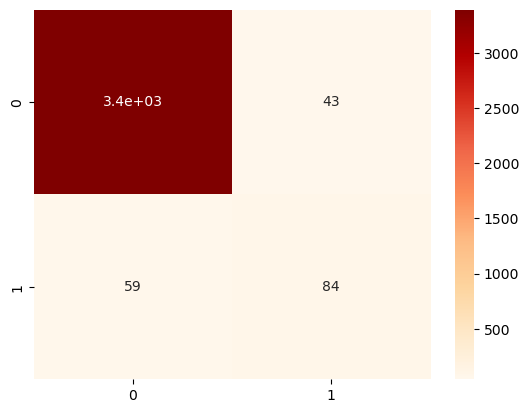

In [64]:
#@title
Model_Name.append('Bidirectional LSTM')

Model_Score1.append(round(accuracy_score(y_test,  y_pred), 4))
Model_Score2.append(round(precision_score(y_test,  y_pred), 4))
Model_Score3.append(round(recall_score(y_test,  y_pred), 4))
Model_Score4.append(round(f1_score(y_test,  y_pred), 4))
Model_Score5.append(round(roc_auc_score(y_test,  y_pred), 4))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap='OrRd')

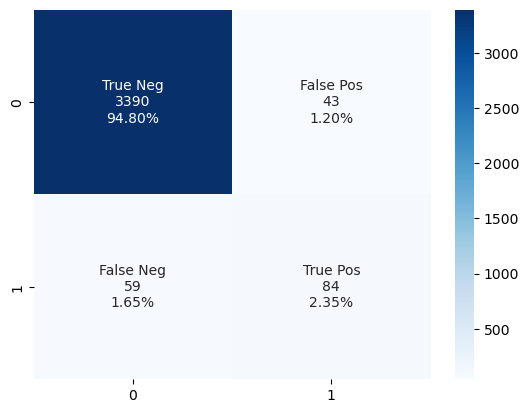

In [105]:
group_names = ["True Neg","False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                      cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues');

Comparision

In [65]:
print(Model_Score1,Model_Score2,Model_Score3,Model_Score4,Model_Score5)

[0.9622, 0.9715] [0.5667, 0.6614] [0.2378, 0.5874] [0.335, 0.6222] [0.6151, 0.7874]


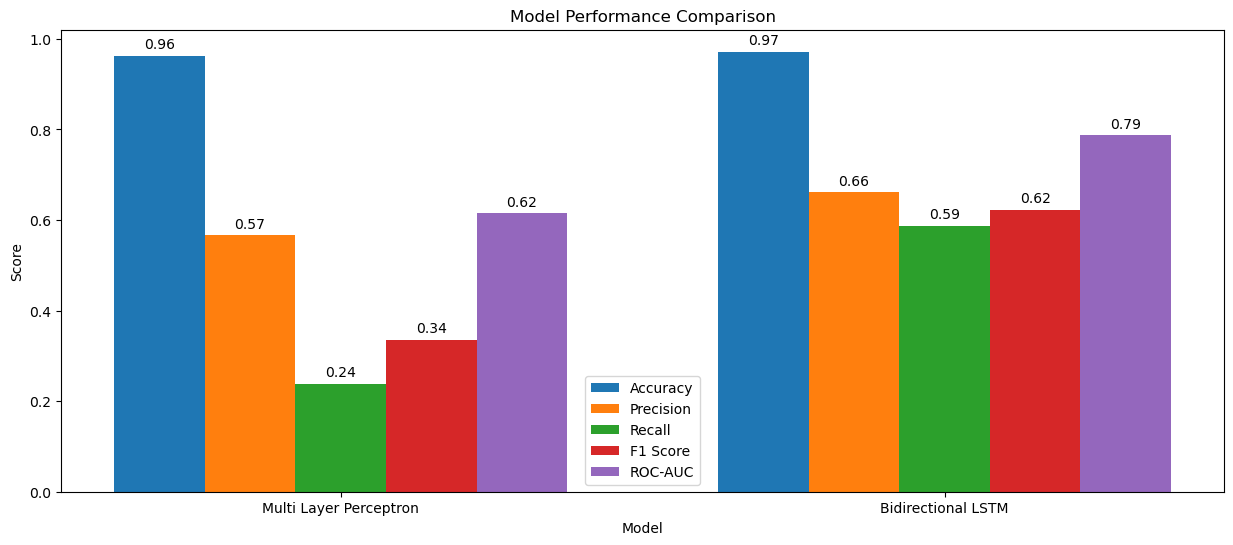

In [66]:
# Set the position of the bars on the x-axis
x = np.arange(len(Model_Name))

# Set the width of the bars
width = 0.15

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(15, 6))

# Create the bars for each metric
rects1 = ax.bar(x - 2*width, Model_Score1, width, label='Accuracy')
rects2 = ax.bar(x - width, Model_Score2, width, label='Precision')
rects3 = ax.bar(x, Model_Score3, width, label='Recall')
rects4 = ax.bar(x + width, Model_Score4, width, label='F1 Score')
rects5 = ax.bar(x + 2*width, Model_Score5, width, label='ROC-AUC')

# Add labels, title and legend to the chart
ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(Model_Name)
ax.legend()

# Add value labels to each bar
def add_value_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
add_value_labels(rects1)
add_value_labels(rects2)
add_value_labels(rects3)
add_value_labels(rects4)
add_value_labels(rects5)
plt.show()

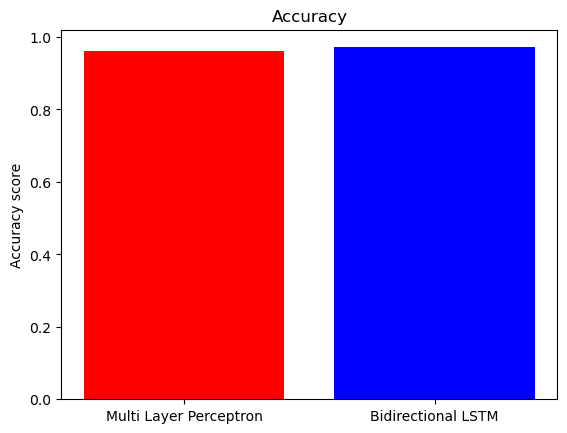

In [119]:

x = np.arange(len(Model_Name))
colors=['red','blue']
for i in range(len(Model_Name)):
    plt.bar(Model_Name[i], Model_Score1[i], color=colors[i % len(colors)])
plt.title('Accuracy')
plt.ylabel('Accuracy score')
plt.show()

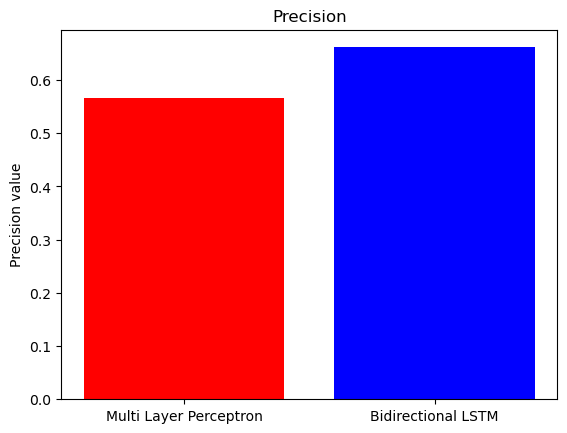

In [118]:

colors=['red','blue']
for i in range(len(Model_Name)):
    plt.bar(Model_Name[i], Model_Score2[i], color=colors[i % len(colors)])
plt.title('Precision')
plt.ylabel('Precision value')
plt.show()

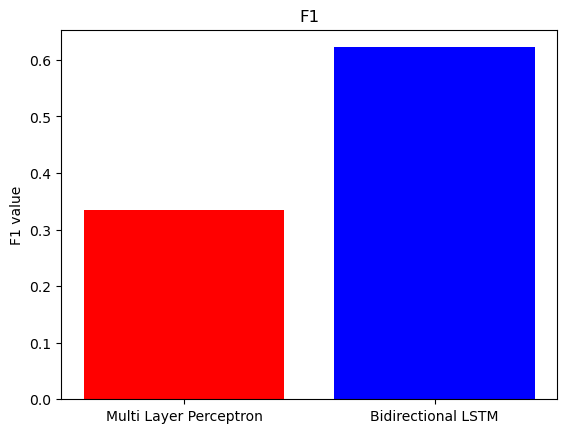

In [117]:

colors=['red','blue']
for i in range(len(Model_Name)):
    plt.bar(Model_Name[i], Model_Score4[i], color=colors[i % len(colors)])
plt.title('F1')
plt.ylabel('F1 value')
plt.show()

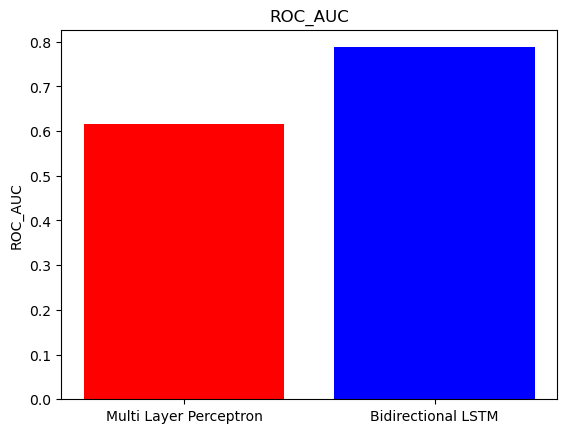

In [121]:

colors=['red','blue']
for i in range(len(Model_Name)):
    plt.bar(Model_Name[i], Model_Score5[i], color=colors[i % len(colors)])
plt.title('ROC_AUC')
plt.ylabel('ROC_AUC')
plt.show()


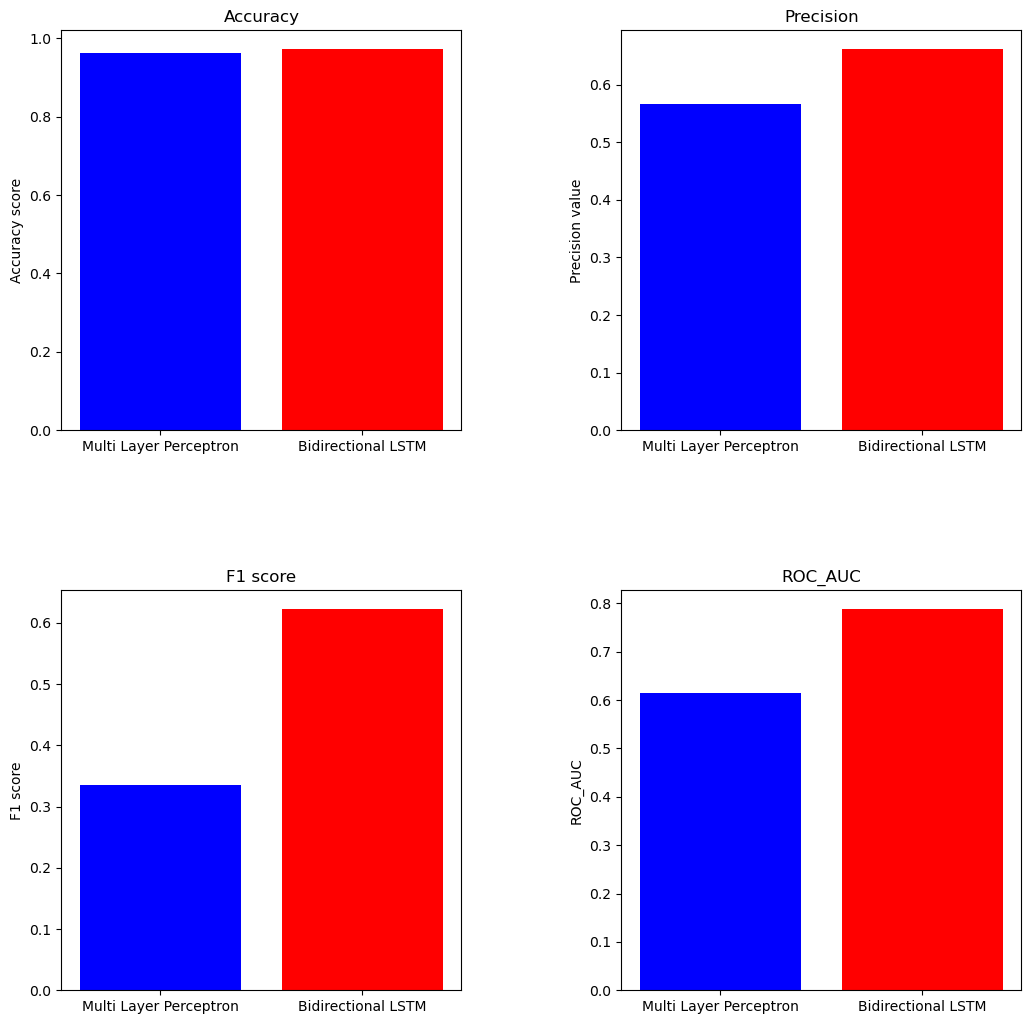

In [113]:
Model_Names = [Model_Name]*4

Model_Scores = [Model_Score1,Model_Score2,Model_Score4,Model_Score5]
plt.figure(figsize=(12,12))
title=['Accuracy','Precision','F1 score','ROC_AUC']
ylabel=["Accuracy score",'Precision value','F1 score','ROC_AUC']
# Define colors for bars
colors = ['blue', 'red']

# Specify the width of the bars
bar_width = 0.1


# Define the number of rows and columns for subplots
num_rows = 2
num_cols = 2

# Calculate the width and height for each subplot
subplot_width = 6  # Total width of the figure divided by the number of columns
subplot_height = 6  # Total height of the figure divided by the number of rows

# Plot each subplot
for i in range(len(Model_Names)):
    ax = plt.subplot(num_rows, num_cols, i+1)
    for j in range(len(Model_Names[i])):
        ax.bar(positions[j] - 0.2, Model_Scores[i][j], color=colors[j % len(colors)])
    ax.set_title(title[i])
    ax.set_ylabel(ylabel[i])
    ax.set_xticks(positions - 0.2)
    ax.set_xticklabels(Model_Names[i])

# Adjust the size of subplots
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

plt.show()



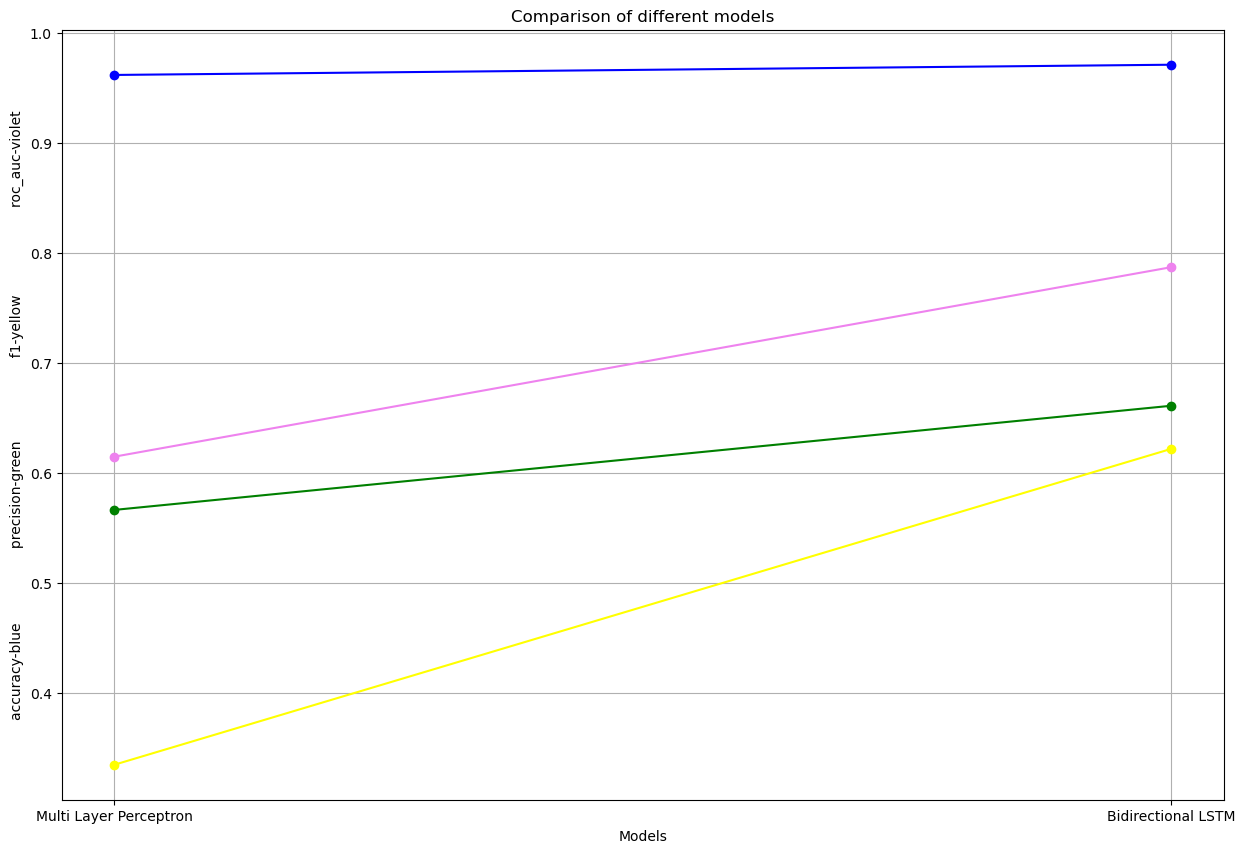

In [68]:
plt.figure(figsize = (15, 10))
plt.plot(Model_Name,Model_Score1, marker = 'o', color = 'blue')
plt.plot(Model_Name,Model_Score2, marker = 'o', color = 'green')
plt.plot(Model_Name,Model_Score4, marker = 'o', color = 'yellow')
plt.plot(Model_Name,Model_Score5, marker = 'o', color = 'Violet')
plt.title('Comparison of different models')
plt.xlabel('Models')
plt.ylabel('accuracy-blue                 precision-green                   f1-yellow                    roc_auc-violet')
plt.grid()
plt.savefig('Model_compare_final_all.jpeg')
plt.show()